In [1]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [2]:
########### PARAMETERS ##############
width = 640
height = 480
threshold = 0.65 # MINIMUM PROBABILITY TO CLASSIFY
cameraNo = 0
#####################################

In [3]:
#### LOAD THE TRAINNED MODEL 
model = load_model('model_trained.keras')

In [4]:
#### PREPORCESSING FUNCTION
def preProcessing(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img/255
    return img

In [5]:
def showImage(img, name='my-img'):
    plt.imshow(img,cmap='gray')
    plt.title(name)
    #plt.axis('off')
    plt.show()

In [10]:
def predictImage(image, model):
    img = np.asarray(imgOriginal)
    img = cv2.resize(img,(32,32))
    img = preProcessing(img)
    img = img.reshape(1,32,32,1)
    #### PREDICT
    predictions = model.predict(img)
    classIndex = np.argmax(predictions, axis=1)
    probVal= np.amax(predictions)
    print(classIndex,probVal)
    if probVal> threshold:
        cv2.putText(imgOriginal,str(classIndex) + "   "+str(probVal), (50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),1)
    showImage(imgOriginal)

1/1 [==============================] - 0s 14ms/step
[9] 1.0


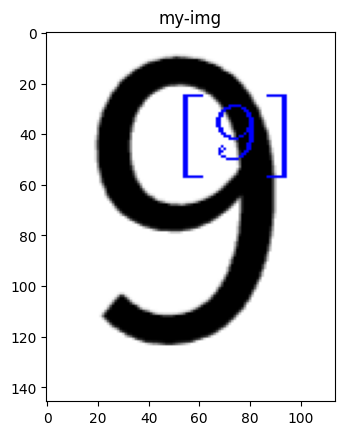

In [19]:
imgOriginal = cv2.imread("numbers_test/9.png")
predictImage(imgOriginal,model)


In [6]:
#### CREATE CAMERA OBJECT
cap = cv2.VideoCapture(cameraNo)
cap.set(3,width)
cap.set(4,height)

True

In [ ]:
while True:
    success, imgOriginal = cap.read()
    img = np.asarray(imgOriginal)
    img = cv2.resize(img,(32,32))
    img = preProcessing(img)
    cv2.imshow("Processsed Image",img)
    img = img.reshape(1,32,32,1)
    #### PREDICT
    predictions = model.predict(img)
    classIndex = int(np.argmax(predictions, axis=1))

    #print(predictions)
    probVal= np.amax(predictions)
    print(classIndex,probVal)

    if probVal> threshold:
        cv2.putText(imgOriginal,str(classIndex) + "   "+str(probVal),
                    (50,50),cv2.FONT_HERSHEY_COMPLEX,
                    1,(0,0,255),1)

    cv2.imshow("Original Image",imgOriginal)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

1/1 [==============================] - 0s 43ms/step
8 0.63124764
1/1 [==============================] - 0s 8ms/step
8 0.5783479
1/1 [==============================] - 0s 7ms/step
8 0.59732807
1/1 [==============================] - 0s 7ms/step
8 0.51864153


/var/folders/bt/72mx1df129nb4mvg33k95wsc0000gn/T/ipykernel_86492/3913665892.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  classIndex = int(np.argmax(predictions, axis=1))


1/1 [==============================] - 0s 8ms/step
8 0.63616157
1/1 [==============================] - 0s 7ms/step
8 0.55437654
1/1 [==============================] - 0s 8ms/step
8 0.58762544
1/1 [==============================] - 0s 8ms/step
8 0.45464176
1/1 [==============================] - 0s 8ms/step
8 0.494707
1/1 [==============================] - 0s 8ms/step
8 0.39707386
1/1 [==============================] - 0s 8ms/step
5 0.46066478
1/1 [==============================] - 0s 8ms/step
5 0.6922967
1/1 [==============================] - 0s 8ms/step
5 0.6940119
1/1 [==============================] - 0s 8ms/step
5 0.71109843
1/1 [==============================] - 0s 7ms/step
5 0.39985076
1/1 [==============================] - 0s 9ms/step
8 0.22793658
1/1 [==============================] - 0s 8ms/step
8 0.26032147
1/1 [==============================] - 0s 7ms/step
8 0.28142035
1/1 [==============================] - 0s 8ms/step
4 0.21730796
1/1 [==============================] - 0s 8m